In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\prave\Dragon Bundle\Machine Learning\ML 137 Consumer_complaints\Consumer_Complaints.csv')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/29/2013,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,Wells Fargo & Company,VA,24540,NaN,NaN,Phone,07/30/2013,Closed with explanation,Yes,No,468882
1,07/29/2013,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,07/31/2013,Closed with explanation,Yes,No,468889
2,07/29/2013,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,Santander Bank US,NY,10065,NaN,NaN,Fax,07/31/2013,Closed,Yes,No,468879
3,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,GA,30084,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468949
4,07/29/2013,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Franklin Credit Management,CT,06106,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,475823


In [3]:
df.shape

(670598, 18)

In [4]:
# We are tking only rows which contains "Consumer Complaint"
df=df[pd.notnull(df['Consumer complaint narrative'])]

In [5]:
df=df.sample(4000)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 217175 to 668307
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 4000 non-null   object
 1   Product                       4000 non-null   object
 2   Sub-product                   2730 non-null   object
 3   Issue                         4000 non-null   object
 4   Sub-issue                     2027 non-null   object
 5   Consumer complaint narrative  4000 non-null   object
 6   Company public response       2038 non-null   object
 7   Company                       4000 non-null   object
 8   State                         3982 non-null   object
 9   ZIP code                      3982 non-null   object
 10  Tags                          703 non-null    object
 11  Consumer consent provided?    4000 non-null   object
 12  Submitted via                 4000 non-null   object
 13  Date sent t

In [7]:
col=['Product','Consumer complaint narrative']
df=df[col]

In [8]:
df.columns

Index(['Product', 'Consumer complaint narrative'], dtype='object')

In [9]:
df.columns=['product','consumer_complaint_narrative']

In [10]:
df['category_id']=df['product'].factorize()[0]

In [11]:
df.head()

,product,consumer_complaint_narrative,category_id
217175,Credit reporting,There are several inquiries on my credit repor...,0
209220,Debt collection,In XXXX I was solicited to use blank checks ma...,1
490102,Debt collection,"NACS, North American Credit Services calls to ...",1
481820,Credit reporting,I went online today to XXXX to check my credit...,0
558837,Debt collection,This is a debt of more than 10 yrs old that ha...,1


In [12]:
from io import StringIO
category_id_df=df[['product','category_id']].drop_duplicates().sort_values('category_id')
category_id_df

,product,category_id
217175,Credit reporting,0
209220,Debt collection,1
606809,Student loan,2
580098,Mortgage,3
507685,Credit card,4
82652,Prepaid card,5
204912,Consumer Loan,6
653887,Bank account or service,7
568293,Money transfers,8
493437,Other financial service,9


In [13]:
category_to_id=dict(category_id_df.values)
id_to_category=dict(category_id_df[['category_id','product']].values)

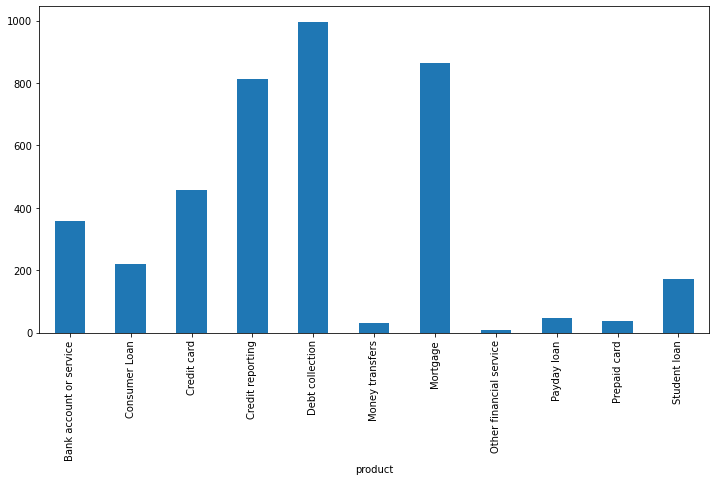

In [14]:
fig = plt.figure(figsize=(12,6))
df.groupby('product').consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(sublinear_tf=True,min_df=5,norm='l2',encoding='latin-1',ngram_range=(1,2),stop_words='english')
features=tfidf.fit_transform(df['consumer_complaint_narrative']).toarray()
labels=df.category_id
features.shape

(4000, 11067)

In [26]:
from sklearn.feature_selection import chi2

N=2
for product,category_id in sorted(category_to_id.items()):
    features_chi2=chi2(features,labels==category_id)
    indices=np.argsort(features_chi2[0])
    feature_names=np.array(tfidf.get_feature_names())[indices]
    unigrams=[v for v in feature_names if len(v.split(' '))==1]
    bigrams=[v for v in feature_names if len(v.split(' '))==2]
    print("# '{}'".format(product))
    print(". Most correlated unigrams:\n  .{}".format('\n  .'.join(unigrams[-N:])))
    print(". Most correlated bigrams:\n  .{}".format('\n  .'.join(bigrams[-N:])))

# 'Bank account or service'
. Most correlated unigrams:
  .checking
  .overdraft
. Most correlated bigrams:
  .overdraft fees
  .checking account
# 'Consumer Loan'
. Most correlated unigrams:
  .car
  .vehicle
. Most correlated bigrams:
  .finance company
  .auto loan
# 'Credit card'
. Most correlated unigrams:
  .express
  .card
. Most correlated bigrams:
  .american express
  .credit card
# 'Credit reporting'
. Most correlated unigrams:
  .experian
  .equifax
. Most correlated bigrams:
  .equifax xxxx
  .credit report
# 'Debt collection'
. Most correlated unigrams:
  .collection
  .debt
. Most correlated bigrams:
  .collect debt
  .collection agency
# 'Money transfers'
. Most correlated unigrams:
  .gram
  .western
. Most correlated bigrams:
  .money gram
  .western union
# 'Mortgage'
. Most correlated unigrams:
  .modification
  .mortgage
. Most correlated bigrams:
  .xxxx mortgage
  .loan modification
# 'Other financial service'
. Most correlated unigrams:
  .oregon
  .upper
. Most

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['consumer_complaint_narrative'], df['product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [29]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Credit reporting']


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

In [35]:
models=[LogisticRegression(random_state=0),
       RandomForestClassifier(n_estimators=100,max_depth=5,random_state=0),
      LinearSVC(),MultinomialNB()]
cv=10
cv_df=pd.DataFrame(index=range(cv*len(models)))
entries=[]
for model in models:
    model_name=model.__class__.__name__
    accuracies=cross_val_score(model,features,labels,scoring='accuracy',cv=cv)
    for fold_idx,accuracy in enumerate(accuracies):
        entries.append((model_name,fold_idx,accuracy))
cv_df=pd.DataFrame(entries,columns=['model_name','fold_idx','accuracy'])

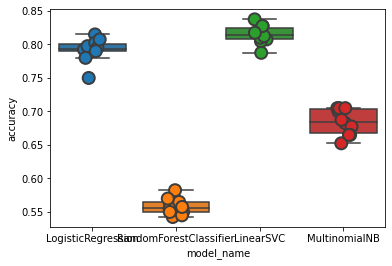

In [38]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=12, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [39]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.81475
LogisticRegression        0.79200
MultinomialNB             0.68450
RandomForestClassifier    0.55800
Name: accuracy, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

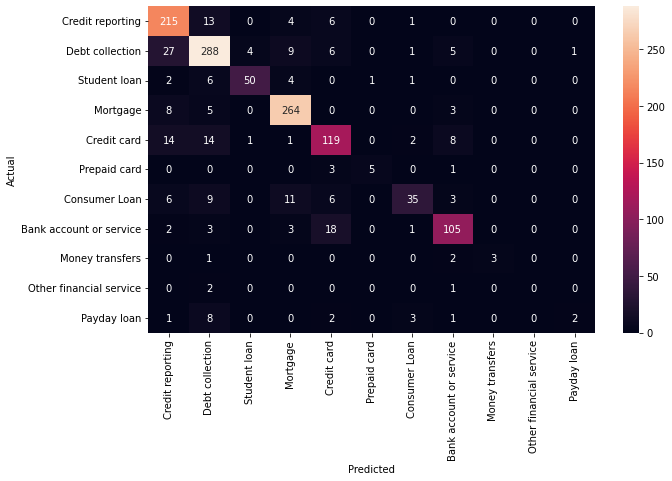

In [44]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df['product'].values, yticklabels=category_id_df['product'].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [46]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['product', 'consumer_complaint_narrative']])
      print('')

'Debt collection' predicted as 'Credit reporting' : 27 examples.


,product,consumer_complaint_narrative
354336,Debt collection,"On XXXX XXXX, 2014 I opened a case against XXX..."
96504,Debt collection,First I felt I was getting no cooperation from...
373925,Debt collection,I was denied credit and I pulled my credit rep...
580775,Debt collection,The debit was paid in full upon cancellation o...
105203,Debt collection,It is so unfortunate in XXXX we have companies...
72502,Debt collection,Portfolio Recovery is knowingly reporting fals...
496276,Debt collection,There are XXXX hard credit inquiries that I di...
93506,Debt collection,"Tried to contact attorney on file, I even thou..."
631803,Debt collection,"SELIP & STYLIANOU , LLP ( presenting XXXX XXXX..."
502717,Debt collection,Account remaining on my credit report after th...



'Mortgage' predicted as 'Credit reporting' : 8 examples.


,product,consumer_complaint_narrative
375293,Mortgage,XXXX XXXX XXXX has reported to the credit bure...
68538,Mortgage,SLS refuses to give me the proper XX/XX/XXXX X...
345000,Mortgage,Home Foreclosed upon in XX/XX/XXXX. Settlement...
370954,Mortgage,Underwriter at BBVA bank is using a credit rep...
595736,Mortgage,I found a derogatory account from Ditech on my...
663389,Mortgage,I have been paying on equity line of credit fo...
76235,Mortgage,A home equity line of credit that I settled as...
574329,Mortgage,I applied for a refinance over 2 months ago an...



'Credit card' predicted as 'Credit reporting' : 14 examples.


,product,consumer_complaint_narrative
88523,Credit card,I am being billed by Home Depot for order # XX...
224379,Credit card,I filed an complaint with Barclays bank of Del...
375798,Credit card,"On XX/XX/2016, I received a response from Well..."
213062,Credit card,US Bank placed an unauthorized inquiry on my c...
361439,Credit card,US bank is reflecting on my credit report that...
348913,Credit card,"Paypal Credit, aka XXXX, did an inquiry on my ..."
573985,Credit card,capital one is hitting me with a 30 day late o...
233103,Credit card,I am once again reaching out and requesting yo...
105128,Credit card,I can no longer access my XXXX account. I had ...
631212,Credit card,For inaccurate reporting and failing to proper...



'Consumer Loan' predicted as 'Credit reporting' : 6 examples.


,product,consumer_complaint_narrative
586222,Consumer Loan,I had an auto loan with XXXX. from XXXX/XXXX/X...
514025,Consumer Loan,"While reviewing my XXXX credit report, I notic..."
95841,Consumer Loan,I traded in a car I was purchasing from Drivet...
378678,Consumer Loan,central financial put a blemish on my credit r...
66287,Consumer Loan,On XXXX XXXX I submitted a form to LendingTree...
208530,Consumer Loan,Security National Automotive Acceptance Compan...



'Credit reporting' predicted as 'Debt collection' : 13 examples.


,product,consumer_complaint_narrative
506134,Credit reporting,Account is more than 7 years old. My car was r...
608870,Credit reporting,Due to the fact that my problem does n't have ...
488707,Credit reporting,Was not happy with the decision made so I inve...
489741,Credit reporting,original debt owed to XXXX XXXX visa. \nover 7...
345793,Credit reporting,"On XX/XX/XXXX, the XXXX XXXX XXXX company in X..."
373927,Credit reporting,XXXX financial institutions have provided me w...
514647,Credit reporting,XXXX XXXX placed XXXX previously removed accou...
83918,Credit reporting,On my credit reports there is an account that ...
559816,Credit reporting,I paid XXXX XXXX XXXX for a XXXX Collections f...
495042,Credit reporting,"Disputed final bill amount with XXXX XXXX, for..."



'Student loan' predicted as 'Debt collection' : 6 examples.


,product,consumer_complaint_narrative
565720,Student loan,On XXXX/XXXX/16 I received a letter from the c...
227807,Student loan,Pursuant to a letter I received from XXXX ( XX...
589808,Student loan,College Assist contracts with the XXXX XXXX XX...
593107,Student loan,"In 2009, I was trying to enroll with XXXX Univ..."
614470,Student loan,Navient continues to contact my co-signer and ...
590597,Student loan,I was sent a letter giving condolences for my ...



'Credit card' predicted as 'Debt collection' : 14 examples.


,product,consumer_complaint_narrative
67389,Credit card,At the time of my divorce the judge ordered my...
83535,Credit card,XXXX keeps calling me in reference to a Verve ...
576031,Credit card,Bank card made unauthorized withdrawals over y...
361701,Credit card,I am a victim of identity theft. I disputed th...
570410,Credit card,Today I applied for a Sears MasterCard and was...
86546,Credit card,"Robocall from "" XXXX '' asking for information..."
83360,Credit card,There is a 6.5 year old debt that I have been ...
567670,Credit card,This bank voluntarily undertook to lend me mon...
95165,Credit card,I have contacted Capital One to let them know ...
205932,Credit card,Out of the blue I started getting several call...



'Consumer Loan' predicted as 'Debt collection' : 9 examples.


,product,consumer_complaint_narrative
91257,Consumer Loan,I previously contacted your agency on XXXX XXX...
82051,Consumer Loan,Statue of limitations expired in 2011 with ori...
116704,Consumer Loan,"Interest charged is 24.99 %, when Washington X..."
516401,Consumer Loan,This company has call my cell phone and house ...
668253,Consumer Loan,when the debt was sold they never send me a le...
235071,Consumer Loan,"I live in XXXX, Missouri. Tower Loans ( out of..."
353793,Consumer Loan,In XXXX of this year I filed a CFPB case # XXX...
367912,Consumer Loan,I have submitted XXXX complaints prior to this...
363372,Consumer Loan,Sierra Auto Finance has been calling me at my ...



'Payday loan' predicted as 'Debt collection' : 8 examples.


,product,consumer_complaint_narrative
380248,Payday loan,I keep receiving calls from NCS Collections fo...
613960,Payday loan,This company is guilty of predatory lending an...
219908,Payday loan,on XXXX XXXX 2015 I paid my delinquent loan in...
637786,Payday loan,I recieved a {$500.00} loan from a company cal...
578003,Payday loan,They keep harassing me calling my job and putt...
642396,Payday loan,"Company XXXX is calling me, my family members,..."
372227,Payday loan,Illegal interest rates charged in Louisiana by...
355591,Payday loan,Northway Financial a payday loan company exten...



'Debt collection' predicted as 'Mortgage' : 9 examples.


,product,consumer_complaint_narrative
596440,Debt collection,This will be the fifth complaint against CALIB...
606333,Debt collection,Repeatedly calling concerning. a mortgagee the...
670148,Debt collection,"XXXX XXXX XXXX, XXXX XXXX : Refinanced my HELO..."
567836,Debt collection,I continuously tried to explain to the represe...
91237,Debt collection,Ocwen starts calling after the first of the mo...
577372,Debt collection,"On XXXX XXXX, XXXX, my home was foreclosed on...."
87426,Debt collection,"In XX/XX/XXXX, USA Discounters/USA Living file..."
567840,Debt collection,There is so much malfeasance with XXXX nationa...
599267,Debt collection,"XXXX Claim I took out loan Wells Fargo 2011, i..."



'Consumer Loan' predicted as 'Mortgage' : 11 examples.


,product,consumer_complaint_narrative
90574,Consumer Loan,"On XXXX/XXXX/XXXX, I sent a payoff to Loan Dep..."
240362,Consumer Loan,AVANT LOANS : This company does not allow you ...
576804,Consumer Loan,Wells Fargo Dealer Services wo n't auto-apply ...
507648,Consumer Loan,It happened around first week of XXXX 2015. I ...
97690,Consumer Loan,This is my third time contacting the CFPB abou...
520422,Consumer Loan,I have 2003 XXXX financed through United Auto ...
649568,Consumer Loan,I first filed a complaint on or about XXXX/XXX...
486779,Consumer Loan,THE XXXX APPLICATION FOR THE XXXX LOAN WAS REJ...
559817,Consumer Loan,I recieved a preapproved application in the ma...
493029,Consumer Loan,I contacted Toyota Financial Services when my ...



'Credit reporting' predicted as 'Credit card' : 6 examples.


,product,consumer_complaint_narrative
608084,Credit reporting,XXXX XXXX XXXX XXXXXXXXXXXX XXXX XX/XX/XXXX to...
205067,Credit reporting,XXXX Bank is systematically discriminating aga...
494282,Credit reporting,"XXXX, XXXX inquired on my account recently and..."
95370,Credit reporting,I was seeking XXXX of my free credit reports a...
378064,Credit reporting,The Creditor has falsely documented our credit...
593119,Credit reporting,My credit report is showing a sync XXXX credit...



'Debt collection' predicted as 'Credit card' : 6 examples.


,product,consumer_complaint_narrative
571969,Debt collection,Was told I would have to appear in court with ...
209220,Debt collection,In XXXX I was solicited to use blank checks ma...
492629,Debt collection,I had a dental issue and paid for it using Car...
641378,Debt collection,I have reached out the this company and never ...
61043,Debt collection,I did not open this credit card account and ha...
646854,Debt collection,XXXX XXXX XXXX began taking automatic payments...



'Consumer Loan' predicted as 'Credit card' : 6 examples.


,product,consumer_complaint_narrative
656305,Consumer Loan,I applied for a loan with Discover to consolid...
622967,Consumer Loan,"Care Credit, aka Synchrony Bank, GE Capital ba..."
608635,Consumer Loan,santander bank issued me a over draft acct tha...
363752,Consumer Loan,"I am a victim of deceptive advertising on a "" ..."
235221,Consumer Loan,I made an on line purchase of a class ring in ...
644757,Consumer Loan,Synchrony Bank lowers my credit limit down to ...



'Bank account or service' predicted as 'Credit card' : 18 examples.


,product,consumer_complaint_narrative
347013,Bank account or service,"XX/XX/2014, I booked flights with XXXX XXXX fo..."
508892,Bank account or service,"On XXXX XXXX, 2015, I contacted Navy Federal C..."
570378,Bank account or service,I called the company advised them of an unauth...
502222,Bank account or service,I purchased XXXX train tickets on XXXX XXXX 20...
489629,Bank account or service,My husband took out a no interest for 12 month...
63331,Bank account or service,On XXXX/XXXX/XX/XX/2015 A customer paid a bill...
487793,Bank account or service,Chase closed down by business account and redu...
641426,Bank account or service,I am an XXXX in XXXX that works on behalf of X...
236872,Bank account or service,I transferred money from my Rushcard Prepaid V...
595852,Bank account or service,Paypal notified me that I had the option to us...



'Credit card' predicted as 'Bank account or service' : 8 examples.


,product,consumer_complaint_narrative
558976,Credit card,I filed the dispute with Barclays Bank concern...
227536,Credit card,I spoke to XXXX at the ceo 's office of usaa a...
226046,Credit card,When on XXXX XXXX I repeatedly tried to submit...
212351,Credit card,I paid for a wedding vendor to provide a servi...
500118,Credit card,XXXX XXXX is allowing unatherised transiactoin...
478202,Credit card,My husband and I have a Bank of America Visa a...
59649,Credit card,We had fraud in our office and money was stole...
86799,Credit card,"On XXXX/XXXX/2015, Dillards/Wells Fargo Bank o..."


In [47]:
model.fit(features, labels)

LinearSVC()

In [48]:
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Bank account or service':
  . Top unigrams:
       . bank
       . overdraft
  . Top bigrams:
       . debit card
       . account bank
# 'Consumer Loan':
  . Top unigrams:
       . vehicle
       . car
  . Top bigrams:
       . auto loan
       . finance company
# 'Credit card':
  . Top unigrams:
       . card
       . synchrony
  . Top bigrams:
       . credit card
       . card company
# 'Credit reporting':
  . Top unigrams:
       . equifax
       . experian
  . Top bigrams:
       . xxxx account
       . trans union
# 'Debt collection':
  . Top unigrams:
       . debt
       . collect
  . Top bigrams:
       . claims owe
       . times day
# 'Money transfers':
  . Top unigrams:
       . western
       . union
  . Top bigrams:
       . western union
       . 00 sent
# 'Mortgage':
  . Top unigrams:
       . mortgage
       . home
  . Top bigrams:
       . mortgage payment
       . xxxx mortgage
# 'Other financial service':
  . Top unigrams:
       . oregon
       . solutions
  . 

In [49]:
# Prediction
texts = ["I can't get the money out of the country.",
         "I requested a home loan modification through Bank of America. Bank of America never got back to me.",
         "Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "I have no money to pay my tuition"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"I can't get the money out of the country."
  - Predicted as: 'Bank account or service'

"I requested a home loan modification through Bank of America. Bank of America never got back to me."
  - Predicted as: 'Mortgage'

"Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"
  - Predicted as: 'Bank account or service'

"It has been difficult for me to find my past due balance. I missed a regular monthly payment"
  - Predicted as: 'Credit card'

"I have no money to pay my tuition"
  - Predicted as: 'Debt collection'

